In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Обнаружение прямых линий 
# https://docs.opencv.org/3.4/d6/d10/tutorial_py_houghlines.html

img = cv.imread('../lab1/test.jpg', cv.COLOR_BGR2GRAY)
assert img is not None, "Файл не найден."

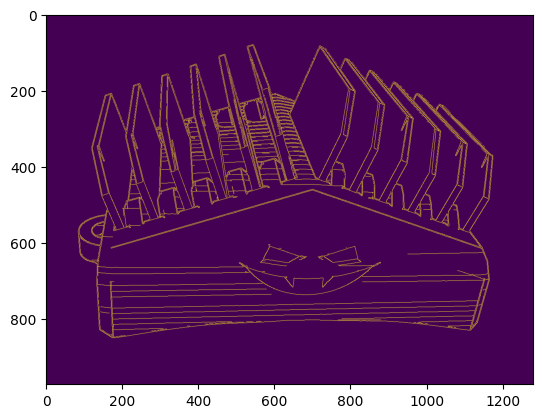

In [12]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 2. Находим границы (Canny)
edges = cv.Canny(gray, 50, 150, apertureSize=3)

plt.imshow(edges)


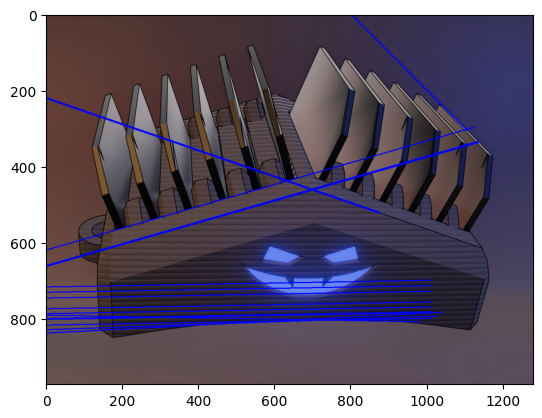

In [13]:
# 3. Классический Хафф (HoughLines)
lines = cv.HoughLines(edges, rho=1, theta=np.pi / 180, threshold=200)

img_hough = img.copy()
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv.line(img_hough, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(img_hough)


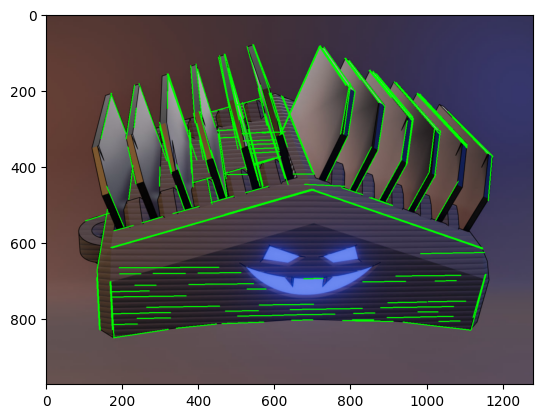

In [14]:
# 4. Вероятностное преобразование Хаффа (HoughLinesP)
lines_p = cv.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

img_hough_p = img.copy()
if lines_p is not None:
    for l in lines_p:
        x1, y1, x2, y2 = l[0]
        cv.line(img_hough_p, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img_hough_p)